# Kmeans Clustering. 
### Classification Banknotes. Using variance and skewness.
___

#### First: Import data. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
#file obtain from openML by Coursera
file_to_read="Banknote.csv"
df_banknote=pd.read_csv(file_to_read)
# delete duplicated there is not null values
df_banknote= df_banknote.drop_duplicates()
df_banknote.dtypes

V1    float64
V2    float64
dtype: object

#### First applications of kmeans algorithm

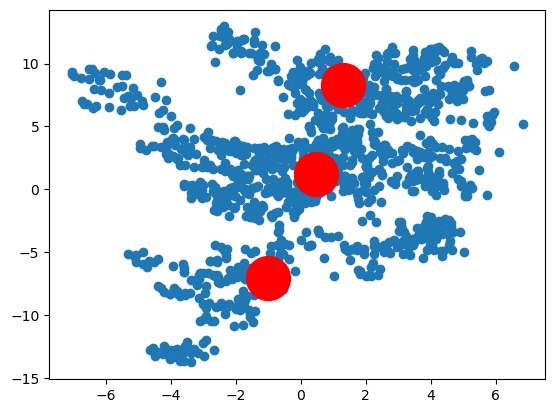

In [9]:


np_banknote=np.array(df_banknote)

kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(np_banknote)

etiquetas=kmeans.labels_
clusters= kmeans.cluster_centers_
plt.scatter(np_banknote[:,0], np_banknote[:,1])
plt.scatter(clusters[:,0], clusters[:,1], s=1000, color="red")

In [12]:
# norm data with max-min 
min_data=np.min(df_banknote,0)
max_data=np.max(df_banknote,0)
normed_data=(df_banknote- min_data)/ (max_data- min_data)
normed_data.head()

,V1,V2
0,0.769004,0.839643
1,0.835659,0.820982
2,0.786629,0.416648
3,0.757105,0.871699
4,0.531578,0.348662


In [4]:
# with z_score
from scipy import stats

# create numpy array
values=np.array(df_banknote)

# Zscores V1 (x)=( V1(x) - V1 mean) / V1 std
zscore_bank=stats.zscore(values)


c:\Users\T\miniconda3\envs\MiConda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\T\miniconda3\envs\MiConda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\T\miniconda3\envs\MiConda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\T\miniconda3\envs\MiConda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\T\minic

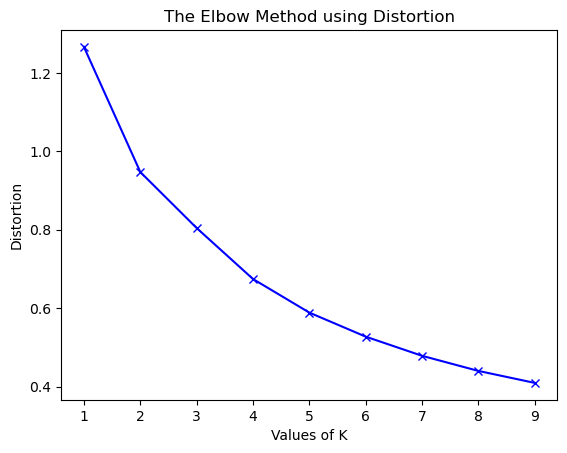

In [7]:
# from https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/
from sklearn import metrics
from scipy.spatial.distance import cdist
X=zscore_bank
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
	# Building and fitting the model
	kmeanModel = KMeans(n_clusters=k).fit(X)
	kmeanModel.fit(X)

	distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
										'euclidean'), axis=1)) / X.shape[0])
	inertias.append(kmeanModel.inertia_)

	mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
								'euclidean'), axis=1)) / X.shape[0]
	mapping2[k] = kmeanModel.inertia_

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()



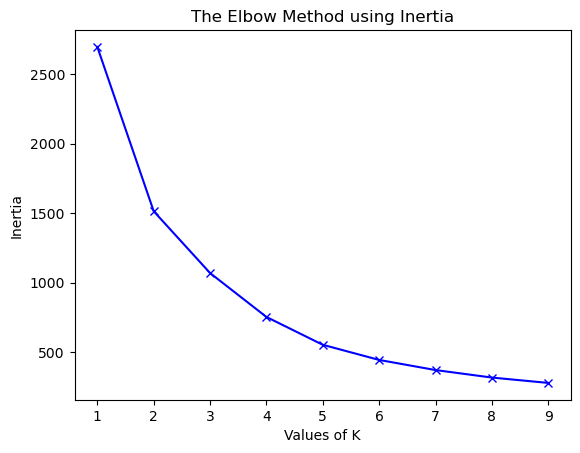

In [8]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()


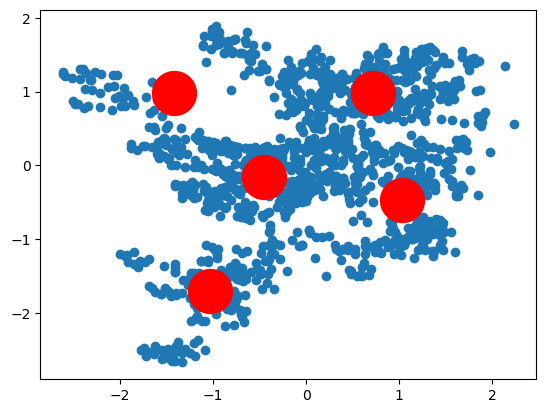

In [9]:


kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(zscore_bank)

etiquetas=kmeans.labels_
clusters= kmeans.cluster_centers_
plt.scatter(zscore_bank[:,0], zscore_bank[:,1])
plt.scatter(clusters[:,0], clusters[:,1], s=1000, color="red")

#### Let's try to make a training model
*first I need to import dataset with all data https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt*

In [2]:
# create a pandas dataframe with a .txt

file_to_read="data_full_banknote.txt"
df_full_banknote=pd.read_csv(file_to_read)
# delete duplicated there is not null values
df_full_banknote= df_full_banknote.drop_duplicates()
df_full_banknote.dtypes


3.6216      float64
8.6661      float64
-2.8073     float64
-0.44699    float64
0             int64
dtype: object

In [3]:
# headers
df_full_banknote.info()
df_full_banknote.columns=["V1", "V2", "V3", "V4", "class"]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1347 entries, 0 to 1370
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   3.6216    1347 non-null   float64
 1   8.6661    1347 non-null   float64
 2   -2.8073   1347 non-null   float64
 3   -0.44699  1347 non-null   float64
 4   0         1347 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 63.1 KB


In [4]:
df_full_banknote.head()

,V1,V2,V3,V4,class
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


In [5]:
df_genuino=np.array(df_full_banknote[df_full_banknote["class"]==1])
df_false=np.array(df_full_banknote[df_full_banknote["class"]==0])

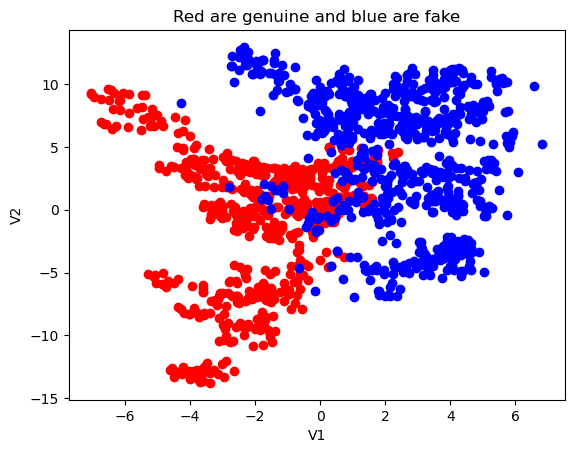

In [13]:

plt.scatter(df_genuino[:,0], df_genuino[:,1], color="red")
plt.scatter(df_false[:,0], df_false[:,1], color="blue")
plt.xlabel("V1")
plt.ylabel("V2")
plt.title("Red are genuine and blue are fake")
plt.show()

